<a href="https://colab.research.google.com/github/B-hunKim/android-lesson-02/blob/master/Digital_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

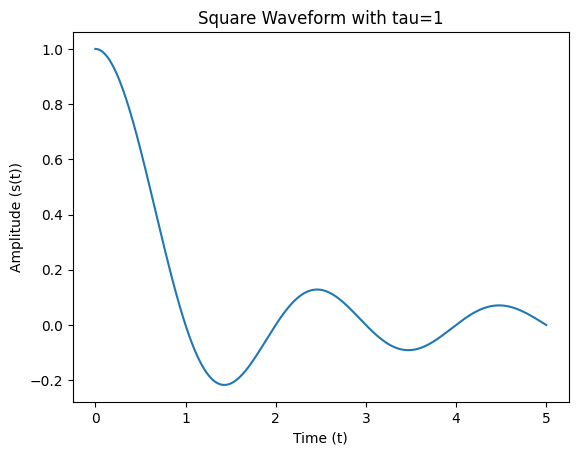

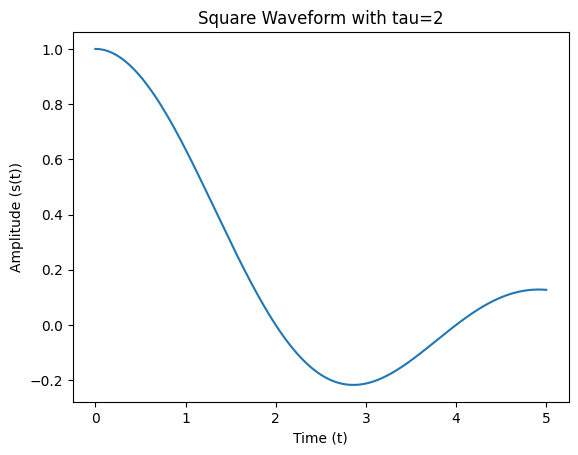

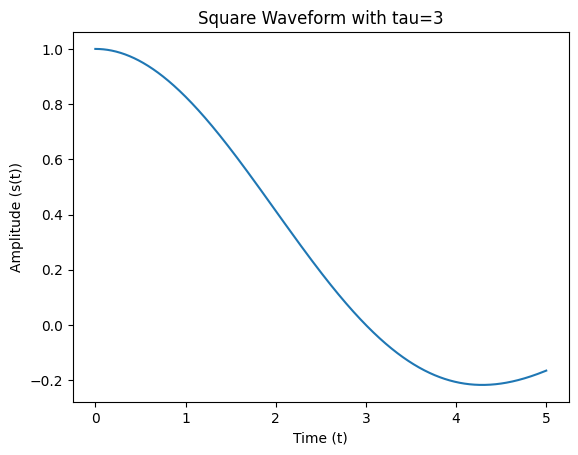

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 범위 생성
t = np.linspace(0, 5, 1000)  # 0에서 5까지 1000개의 데이터 포인트

# 각각의 파라미터에 대한 그래프 생성
A = 1
tau_values = [1, 2, 3]

for tau in tau_values:
    s_t = A * np.sinc(t / tau)  # 주어진 사각파형 함수

    # 새로운 figure 생성
    plt.figure()

    # 그래프 그리기
    plt.plot(t, s_t)

    # 그래프 제목과 레이블 설정
    plt.title(f'Square Waveform with tau={tau}')
    plt.xlabel('Time (t)')
    plt.ylabel('Amplitude (s(t))')

# 모든 그래프를 표시
plt.show()

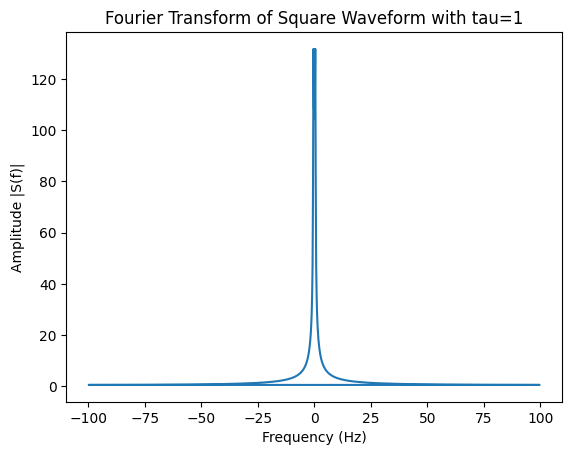

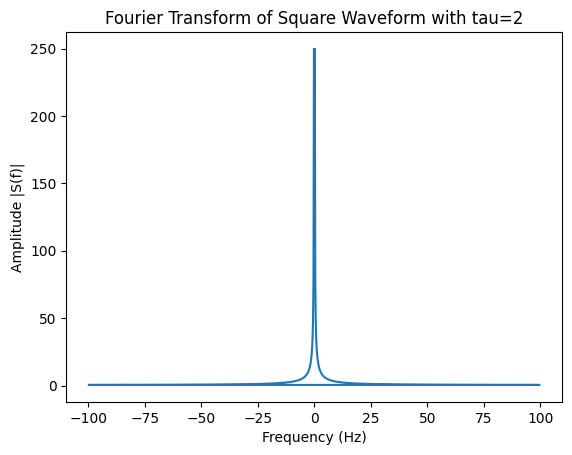

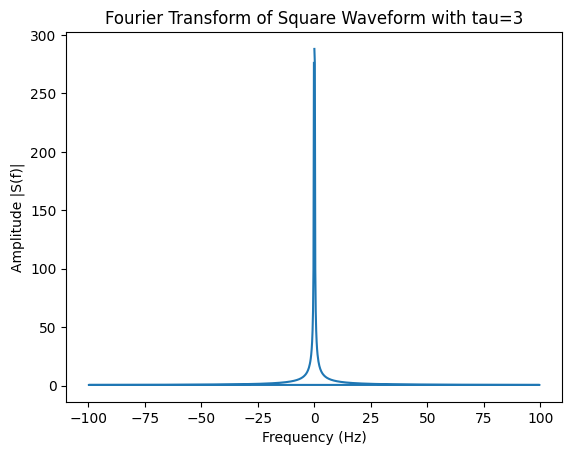

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 범위 생성
t = np.linspace(0, 5, 1000)  # 0에서 5까지 1000개의 데이터 포인트
fs = 1 / (t[1] - t[0])  # 샘플링 주파수

# 주어진 파라미터
A = 1
tau_values = [1, 2, 3]

# 주파수 영역에서의 그래프 생성
for tau in tau_values:
    s_t = A * np.sinc(t / tau)  # 주어진 사각파형 함수
    S_f = np.fft.fft(s_t)  # Fourier 변환

    # 주파수 영역에서의 주파수 값 생성
    f = np.fft.fftfreq(len(t), 1 / fs)

    # 새로운 figure 생성
    plt.figure()

    # 주파수 영역에서의 그래프 그리기
    plt.plot(f, np.abs(S_f))

    # 그래프 제목과 레이블 설정
    plt.title(f'Fourier Transform of Square Waveform with tau={tau}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude |S(f)|')

# 모든 그래프를 표시
plt.show()

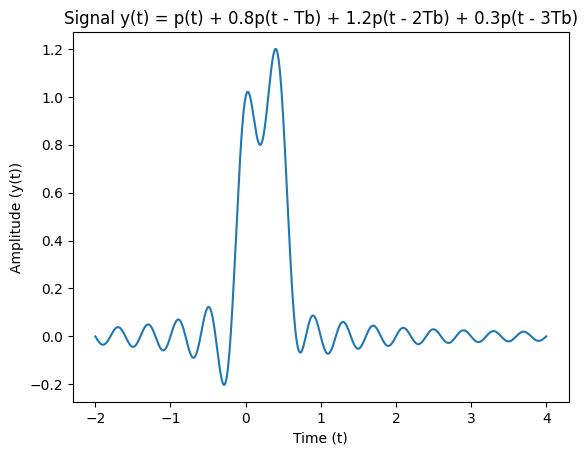

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 범위 생성
t = np.linspace(-2, 4, 1000)  # -2에서 4까지 1000개의 데이터 포인트

# 주어진 파라미터
Tb = 0.2  # Tb 값 설정
A = [1, 0.8, 1.2, 0.3]
T = [0, Tb, 2 * Tb, 3 * Tb]

# 초기화
y_t = np.zeros_like(t)

# 주어진 y(t) 계산
for a, tau in zip(A, T):
    p_t = np.sinc(t / Tb - tau / Tb)
    y_t += a * p_t

# 그래프 그리기
plt.plot(t, y_t)
plt.title('Signal y(t) = p(t) + 0.8p(t - Tb) + 1.2p(t - 2Tb) + 0.3p(t - 3Tb)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude (y(t))')

plt.show()

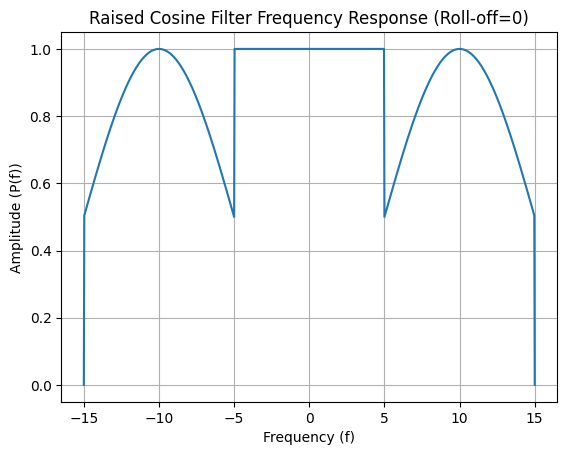

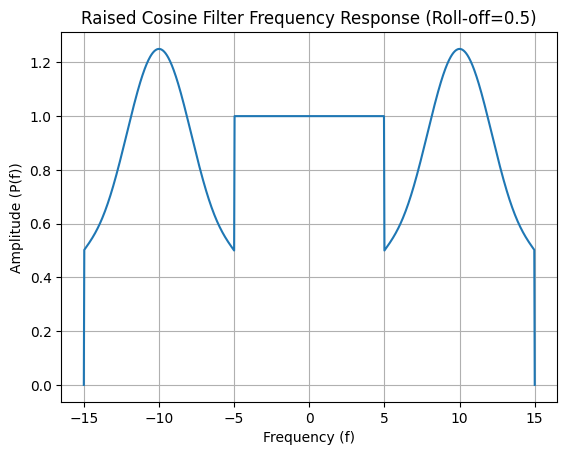

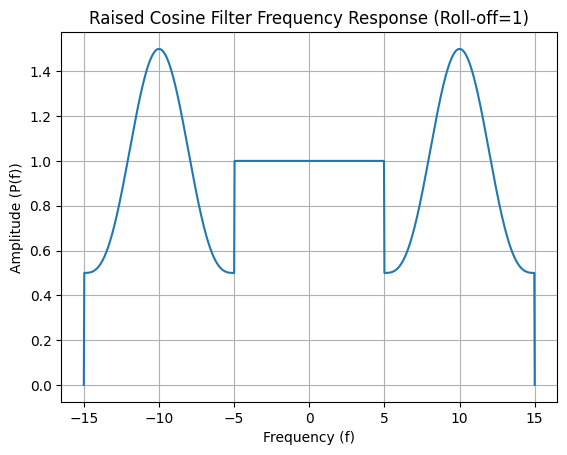

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Raised Cosine Filter의 주파수 응답 함수 정의
def raised_cosine_frequency_response(f, W0, delta, roll_off):
    P_f = np.zeros_like(f)
    for i, freq in enumerate(f):
        if abs(freq) < (W0 - delta):
            P_f[i] = 1
        elif abs(freq) >= (W0 + delta):
            P_f[i] = 0
        else:
            P_f[i] = 0.5 * (1 + np.cos((np.pi * (freq - W0) / (2 * delta))) * (1 + roll_off * np.cos((np.pi * (freq - W0) / delta))))
    return P_f

# 주파수 범위 설정
f = np.linspace(-15, 15, 1000)  # 주파수 범위를 적절히 설정

# Raised Cosine Filter의 주파수 응답 계산 (다양한 roll-off 값에 대해)
W0 = 10  # 최소 대역폭 10 kHz
delta = W0 / 2  # delta 설정
roll_off_values = [0, 0.5, 1]

# 각 roll_off 값에 대한 그래프를 따로 그림
for roll_off in roll_off_values:
    P_f = raised_cosine_frequency_response(f, W0, delta, roll_off)

    # 새로운 figure 생성
    plt.figure()

    # 그래프 그리기
    plt.plot(f, P_f)

    # 그래프 제목과 레이블 설정
    plt.title(f'Raised Cosine Filter Frequency Response (Roll-off={roll_off})')
    plt.xlabel('Frequency (f)')
    plt.ylabel('Amplitude (P(f))')
    plt.grid(True)

plt.show()